In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [10]:
df =  pd.read_pickle("../datos/setas/setas_balance.pkl")

In [11]:
# separamos los datos en X e y

X1 = df.drop("class", axis = 1)
y1 = df["class"] 

In [12]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42) 

In [13]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test1) 

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
train_df= pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train1)})
test_df= pd.DataFrame({'Real': y_test1, 'Predicted': y_pred_test, 'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head() 

,Real,Predicted,Set
1433,e,p,Train
22413,p,p,Train
25118,p,p,Train
3109,p,p,Train
38633,e,e,Train


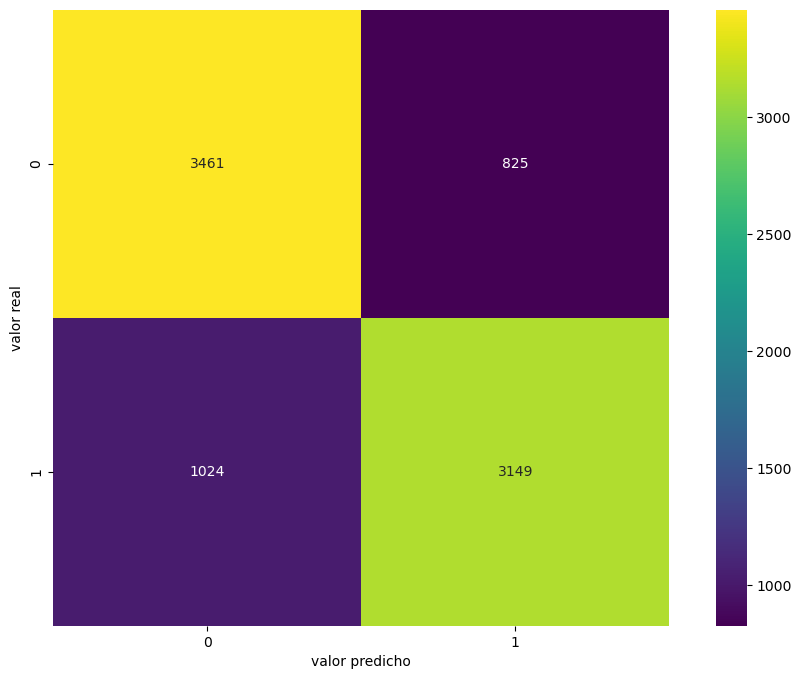

In [9]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show() 

Expliquemos los resultados que vemos en esta matriz de confusión: 

Antes de nada recordemos que en nuestro *dataframe* la variable respuesta se dividía de la siguiente forma: 

- 0: No, los pasajeros *no sobrevivieron al viaje* 

- 1: Yes, los pasajeros *si sobrevivieron al viaje* 


En este contexto: 

- El número 77 (valor real 0 (no sobrevive), valor predicho 0 (no sobrevive)), indica que nuestro modelo a predicho 77 pasajeros que no sobrevivieron que en realidad no sobrevivieron. 

- El número 42 (valor real 1 (sobrevive), valor predicho 1 (sobrevive)), indica que nuestro modelo a predicho 42 pasajeros que sobrevivieron que en realidad sobrevivieron. 

- El número 18 (abajo a la izquierda) (valor real 1 (sobrevive), valor predicho 0 (no sobrevive)), indica que nuestro modelo esta prediciendo 18 pasajeros que no sobrevivieron cuando en realidad lo hicieron. 

- El número 18 (valor real 0 (no sobrevive), valor predicho 1 (sobrevive)) indica que nuestro modelo esta prediciendo 18 pasajeros que  sobrevivieron cuando en realidad no lo hicieron.